In [2]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model  import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\SAI DURGA PRASAD\Desktop\ols_project\data\cancer_reg.csv")

In [4]:
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
df.select_dtypes(include="object")

,binnedinc,geography
0,"(61494.5, 125635]","Kitsap County, Washington"
1,"(48021.6, 51046.4]","Kittitas County, Washington"
2,"(48021.6, 51046.4]","Klickitat County, Washington"
3,"(42724.4, 45201]","Lewis County, Washington"
4,"(48021.6, 51046.4]","Lincoln County, Washington"
...,...,...
3042,"(45201, 48021.6]","Ellsworth County, Kansas"
3043,"(48021.6, 51046.4]","Finney County, Kansas"
3044,"(51046.4, 54545.6]","Ford County, Kansas"
3045,"(48021.6, 51046.4]","Franklin County, Kansas"


In [6]:
df.shape

(3047, 34)

In [7]:
df.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctother

In [8]:
null = df.isnull().sum()
print(null[null > 0])

pctsomecol18_24            2285
pctemployed16_over          152
pctprivatecoveragealone     609
dtype: int64


Find the every column is there any constant value through out the column or not 

In [9]:
def find_constant_columns(data):
    constant_columns = []
    for column in data.columns:
        unique_value = data[column].unique()
        if len(unique_value) == 1:
            constant_columns.append(column)
    return constant_columns

In [10]:
find_constant_columns(df)

[]

Delete that column and this dataset their is no any constant columns

Find the column with few values  and give some threshold

In [11]:
def find_columns_with_few_values(data,threshold):
    few_values_columns = []
    for column in data.columns:
        unique_value_count = len(data[column].unique())
        if unique_value_count < threshold:
            few_values_columns.append(column)
    return few_values_columns

In [12]:
find_columns_with_few_values(df,10)

[]

Find duplicate rows

In [13]:
def find_duplicate_rows(data):
    duplicate  = data[data.duplicated()]
    return duplicate

In [14]:
find_duplicate_rows(df)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate


In dataset no duplicate values

If any duplicate values present in dataset to remove with drop_duplicated function

In [15]:
def delete_duplicates(data):
    data = data.drop_duplicates(keep="first")
    return data
    

In [16]:
delete_duplicates(df)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


if in any dataset contain NAN values to remove or fill with central tendency measures

to give some threshold in data column

In [17]:
def drop_and_fill(data):
    col_to_drop = data.columns[data.isnull().mean()  > 0.5]
    data = data.drop(col_to_drop,axis=1)
    data = data.fillna(data.mean())
    return data

In [18]:
df1 = drop_and_fill(df)

In [19]:
df1.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
avghouseholdsize           0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

In [20]:
df1.shape

(3047, 33)

In the above operation to remove the NAN values is 50% above column will be removed

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  avghouseholdsize         3047 non-null   float64
 14  percentmarried          

In [22]:
df1.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [23]:
def bin_to_num(data):
    binnedinc = []
    for i in data["binnedinc"]:
        i = i.strip("()[]")
        print(i)
        i = i.split(",")
        print(i)
        i = tuple(i)
        print(i)
        i = tuple(map(float,i))
        print(i)
        i = list(i)
        print(i)
        binnedinc.append(i)
    data["binnedinc"] = binnedinc


    data["upper_bound"] = [i[0] for i in data['binnedinc']]
    data["lower_bound"] = [i[1] for i in data['binnedinc']]

    data["median"] = (data['upper_bound'] + data['lower_bound'])/2

    data.drop("binnedinc",axis=1,inplace=True)
    return data



In [24]:
bin_to_num(df1)

61494.5, 125635
['61494.5', ' 125635']
('61494.5', ' 125635')
(61494.5, 125635.0)
[61494.5, 125635.0]
48021.6, 51046.4
['48021.6', ' 51046.4']
('48021.6', ' 51046.4')
(48021.6, 51046.4)
[48021.6, 51046.4]
48021.6, 51046.4
['48021.6', ' 51046.4']
('48021.6', ' 51046.4')
(48021.6, 51046.4)
[48021.6, 51046.4]
42724.4, 45201
['42724.4', ' 45201']
('42724.4', ' 45201')
(42724.4, 45201.0)
[42724.4, 45201.0]
48021.6, 51046.4
['48021.6', ' 51046.4']
('48021.6', ' 51046.4')
(48021.6, 51046.4)
[48021.6, 51046.4]
51046.4, 54545.6
['51046.4', ' 54545.6']
('51046.4', ' 54545.6')
(51046.4, 54545.6)
[51046.4, 54545.6]
37413.8, 40362.7
['37413.8', ' 40362.7']
('37413.8', ' 40362.7')
(37413.8, 40362.7)
[37413.8, 40362.7]
37413.8, 40362.7
['37413.8', ' 40362.7']
('37413.8', ' 40362.7')
(37413.8, 40362.7)
[37413.8, 40362.7]
40362.7, 42724.4
['40362.7', ' 42724.4']
('40362.7', ' 42724.4')
(40362.7, 42724.4)
[40362.7, 42724.4]
54545.6, 61494.5
['54545.6', ' 61494.5']
('54545.6', ' 61494.5')
(54545.6, 61494

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,upper_bound,lower_bound,median
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,61494.5,125635.0,93564.75
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,48021.6,51046.4,49534.00
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,48021.6,51046.4,49534.00
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,42724.4,45201.0,43962.70
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,48021.6,51046.4,49534.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,45201.0,48021.6,46611.30
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,48021.6,51046.4,49534.00
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,51046.4,54545.6,52796.00
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,48021.6,51046.4,49534.00


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   medianage                3047 non-null   float64
 9   medianagemale            3047 non-null   float64
 10  medianagefemale          3047 non-null   float64
 11  geography                3047 non-null   object 
 12  avghouseholdsize         3047 non-null   float64
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [26]:
df1.select_dtypes(include="object").columns

Index(['geography'], dtype='object')

In [27]:
def split_geo_col(data):
    data["county"] = [i.split(",")[0] for i in data["geography"]]
    data["state"] = [i.split(",")[1] for i in data["geography"]]

    data.drop("geography",axis=1,inplace=True)

    return data
    

In [28]:
split_geo_col(df1)

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,upper_bound,lower_bound,median,county,state
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,2.594728,4.821857,1.843479,52.856076,6.118831,61494.5,125635.0,93564.75,Kitsap County,Washington
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.969102,2.246233,3.741352,45.372500,4.333096,48021.6,51046.4,49534.00,Kittitas County,Washington
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.739673,0.465898,2.747358,54.444868,3.729488,48021.6,51046.4,49534.00,Klickitat County,Washington
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.782626,1.161359,1.362643,51.021514,4.603841,42724.4,45201.0,43962.70,Lewis County,Washington
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.270192,0.665830,0.492135,54.027460,6.796657,48021.6,51046.4,49534.00,Lincoln County,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,3.837754,0.327613,1.700468,51.063830,7.773512,45201.0,48021.6,46611.30,Ellsworth County,Kansas
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,2.326771,4.044920,14.130288,52.007937,8.186470,48021.6,51046.4,49534.00,Finney County,Kansas
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,2.313188,1.316472,5.680705,55.153949,7.809192,51046.4,54545.6,52796.00,Ford County,Kansas
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,1.176562,0.244632,2.131790,58.484232,7.582938,48021.6,51046.4,49534.00,Franklin County,Kansas


In [29]:
def one_hot_encoding(data):
    categorical_column = data.select_dtypes(include=["object"]).columns

    one_hot_encoder = OneHotEncoder(sparse=False,handle_unknown="ignore")
    one_hot_encoded = one_hot_encoder.fit_transform(data[categorical_column])

    one_hot_encoded = pd.DataFrame(
        one_hot_encoded,columns=one_hot_encoder.get_feature_names_out(categorical_column)
    )

    data = data.drop(categorical_column,axis=1)

    data = pd.concat([data,one_hot_encoded],axis=1)
    return data


In [30]:
df2 = one_hot_encoding(df1)

In [31]:
df2.shape

(3047, 1904)

In [32]:
df2.to_csv(r"C:\Users\SAI DURGA PRASAD\Desktop\ols_project\data\cancer_data_process.csv",index=False)

In [33]:
df2.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


we can perform outliers detection in processed dataset

In [34]:
processed_data = pd.read_csv(r"C:\Users\SAI DURGA PRASAD\Desktop\ols_project\data\cancer_data_process.csv")

In [35]:
processed_data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


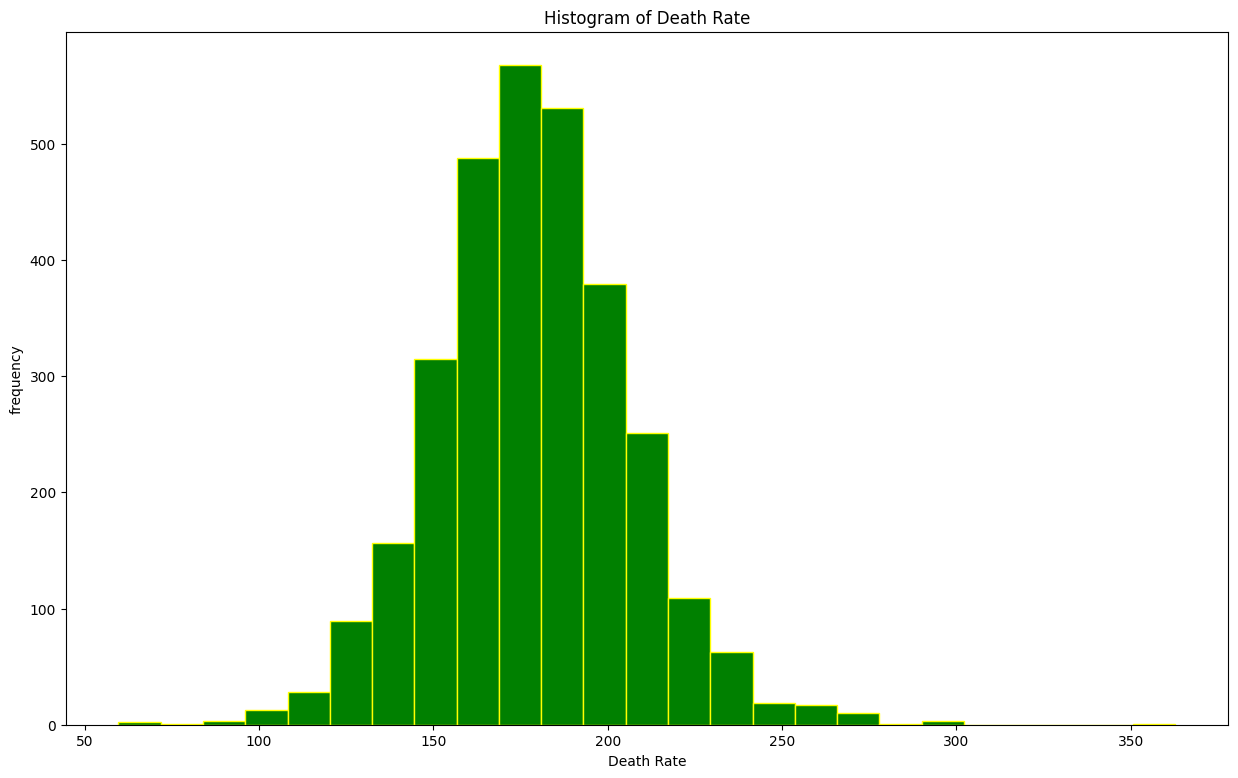

In [36]:
plt.figure(figsize=(15,9))

plt.hist(processed_data["target_deathrate"],bins=25,color="green",edgecolor = "yellow")
plt.xlabel('Death Rate')
plt.ylabel("frequency")
plt.title("Histogram of Death Rate")
plt.show()

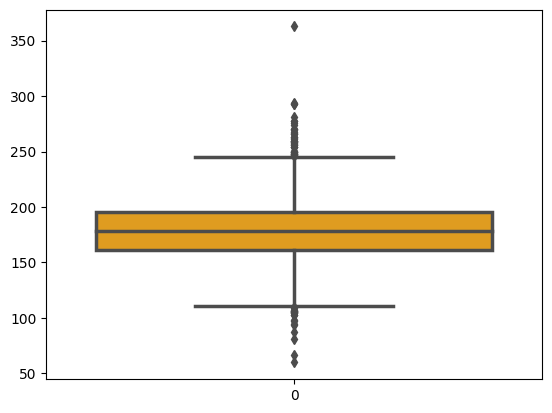

In [37]:
sns.boxplot(processed_data["target_deathrate"],linewidth=2.5,color="orange")
plt.show()

In [38]:
import plotly.express as ex

#df=ex.data.tips()
fig = ex.box(processed_data,y="target_deathrate")
fig.show()


In [39]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y = processed_data["target_deathrate"]))
fig.show()

In [40]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y = processed_data["avganncount"],boxpoints="outliers"))
fig.update_layout(title='Boxplot of Death Rate',
    yaxis_title='Death Rate',
    width=700,
    height=500)
fig.show()

In [41]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Box(y=processed_data['target_deathrate'], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
fig.update_layout(
    title='Boxplot of Death Rate',
    yaxis_title='Death Rate',
    width=700,
    height=500)
fig.show()

In [42]:
fig = go.Figure(data=[go.Box(y=processed_data["avganncount"],boxpoints="outliers")])
fig.update_layout(
                title = "Boxplot in target_deathrate",
                  yaxis_title = "target_deathrate",
                  width = 700,
                  height = 500)
fig.show()

Inter pretation  of Boxplot

avganncount_mean: 606.3385437820807
avganncount_std: 1416.3562232267052


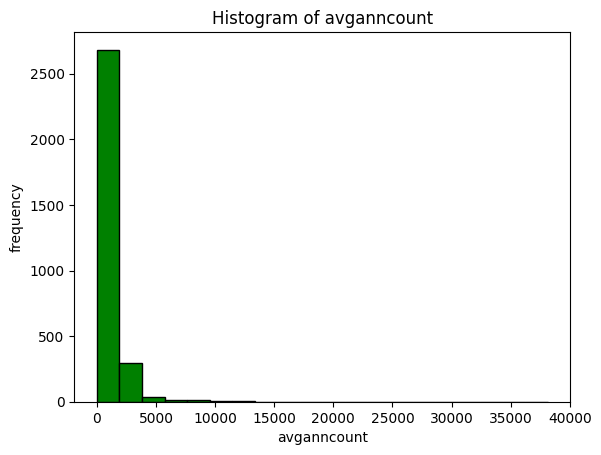

correlation between the avganncount and target_deathrate:  -0.14353161968868813


Text(0.5, 1.0, 'Scatter plot between avganncount vs target_deathrate')

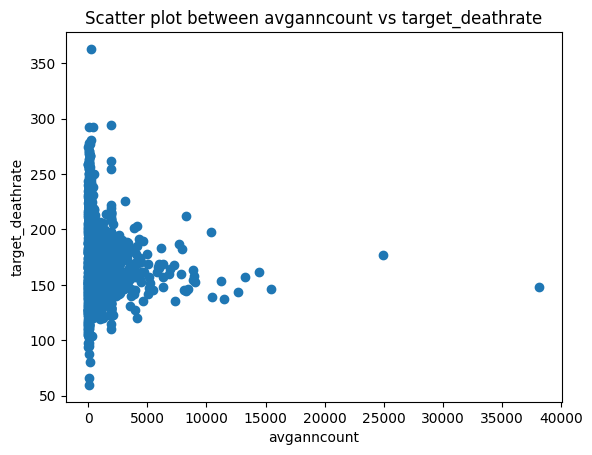

In [43]:
processed_data["avganncount"].skew()

avganncount_mean = processed_data["avganncount"].mean()
avganncount_std = processed_data["avganncount"].std()
print("avganncount_mean: {}".format(avganncount_mean))
print("avganncount_std: {}".format(avganncount_std))

plt.hist(processed_data["avganncount"],bins=20,color="green",edgecolor="black")
plt.xlabel("avganncount")
plt.ylabel("frequency")
plt.title("Histogram of avganncount")
plt.show()


fig  = go.Figure(data=[go.Box(y=processed_data["avganncount"],jitter=0.5,boxpoints="outliers",pointpos=-1.8)])
fig.update_layout(title='Boxplot of Avgnncount',
    yaxis_title='Death Rate',
    width=700,
    height=500)
fig.show()

corr = processed_data["avganncount"].corr(processed_data["target_deathrate"])
print("correlation between the avganncount and target_deathrate: ",corr)



plt.scatter(processed_data["avganncount"],processed_data["target_deathrate"])
plt.xlabel("avganncount")
plt.ylabel("target_deathrate")
plt.title("Scatter plot between avganncount vs target_deathrate")

In [44]:
processed_data.shape

(3047, 1904)

In [45]:
from scipy.stats import normaltest

numerical_columns = processed_data.select_dtypes(include=np.number).columns
numerical_columns

gaussian_columns = []
non_gaussian_columns = []

for col in numerical_columns:
    stat , p = normaltest(processed_data[col])
    print("statistics=%.3f, p=%.3f" % (stat,p))

    alpha = 0.05

    if p > alpha:
        gaussian_columns.append(col)
    else:
        non_gaussian_columns.append(col)

print( gaussian_columns)


statistics=5028.465, p=0.000
statistics=5314.434, p=0.000
statistics=127.363, p=0.000
statistics=943.641, p=0.000
statistics=854.431, p=0.000
statistics=5801.694, p=0.000
statistics=408.566, p=0.000
statistics=4449.679, p=0.000
statistics=4715.992, p=0.000
statistics=42.880, p=0.000
statistics=48.305, p=0.000
statistics=2293.395, p=0.000
statistics=236.299, p=0.000
statistics=508.655, p=0.000
statistics=39.668, p=0.000
statistics=1395.030, p=0.000
statistics=55.596, p=0.000
statistics=536.946, p=0.000
statistics=87.619, p=0.000
statistics=471.048, p=0.000
statistics=73.543, p=0.000
statistics=9.139, p=0.010
statistics=20.036, p=0.000
statistics=1.039, p=0.595
statistics=114.894, p=0.000
statistics=933.419, p=0.000
statistics=1377.835, p=0.000
statistics=4033.108, p=0.000
statistics=3071.494, p=0.000
statistics=218.834, p=0.000
statistics=893.748, p=0.000
statistics=55.722, p=0.000
statistics=1290.293, p=0.000
statistics=847.167, p=0.000
statistics=10017.746, p=0.000
statistics=10017.74

In [46]:
len(gaussian_columns)

1

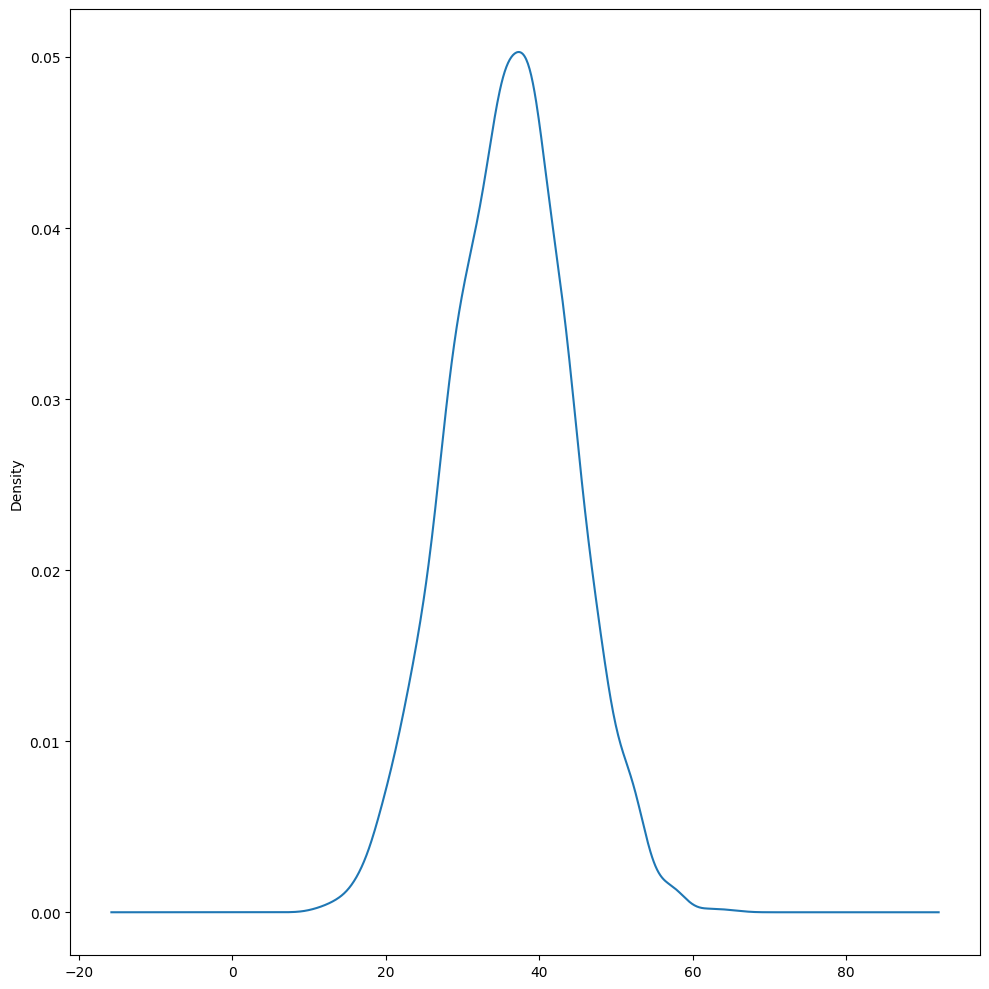

In [47]:
plt.subplots(nrows=1,ncols=1,figsize=(10,10))
for i ,col in enumerate(gaussian_columns):
    processed_data[col].plot(kind = "density",subplots=True,sharex=False)
plt.tight_layout()
plt.show()

In [48]:
gaussian_data = processed_data[gaussian_columns]
basic_info_gaussian = gaussian_data.describe()
print(basic_info_gaussian)

       pctpubliccoverage
count        3047.000000
mean           36.252642
std             7.841741
min            11.200000
25%            30.900000
50%            36.300000
75%            41.550000
max            65.100000


In [49]:
basic_info_gaussian = basic_info_gaussian.loc[["mean",'std','min','max']]
basic_info_gaussian

,pctpubliccoverage
mean,36.252642
std,7.841741
min,11.200000
max,65.100000


Dealing with outlier values for Z score method because this is used only gaussian columns or normal distribution columns only

Z score method we used to change the outliers

In [50]:
upper_bound = basic_info_gaussian['pctpubliccoverage']['mean'] + 3*basic_info_gaussian['pctpubliccoverage']['std']
lower_bound = basic_info_gaussian['pctpubliccoverage']['mean'] - 3*basic_info_gaussian['pctpubliccoverage']['std']

In [51]:
print(upper_bound,lower_bound)

59.777864755203105 12.727419130586192


In [52]:
processed_data[(processed_data['pctpubliccoverage'] > 59.777864755203105) | (processed_data['pctpubliccoverage'] < 12.727419130586192)]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
176,25.0,10,134.3,359.0,27627,4596,24.2,0.000000,42.6,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,862.0,283,136.5,364.9,122641,375629,3.9,449.912014,35.3,34.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1486,1067.0,358,142.9,444.5,51907,118891,10.9,84.110656,65.3,64.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2713,8.0,3,203.3,201.3,68387,5702,9.9,0.000000,36.8,38.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,129.0,54,126.1,332.0,32533,20152,22.8,0.000000,54.8,54.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
def deal_with_outliers(data,col , basic_info):
    highest_bound = basic_info[col]["mean"] + 3*basic_info[col]["std"]
    lowest_bound = basic_info[col]["mean"] - 3*basic_info[col]["std"]
    data = data[(data[col] > highest_bound) | (data[col] < lowest_bound)]
    return data

cols_have_outliers =[]
for col in gaussian_columns:
    data = deal_with_outliers(gaussian_data,col, basic_info_gaussian)
    shape = data.shape
    print(shape)
    print(shape[0]> 0)
    if shape[0] > 0:
        cols_have_outliers.append(col)

print(cols_have_outliers)



(5, 1)
True
['pctpubliccoverage']


Trimming is used to remove the outliers 

In [54]:
for col in cols_have_outliers:
    higest_allowed = basic_info_gaussian[col]['mean'] + 3*basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]['mean'] - 3*basic_info_gaussian[col]["std"]

    trimming_data = processed_data[(processed_data[col] < higest_allowed) & (processed_data[col] > lowest_allowed)]
trimming_data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Capping

In capping their is replace the outliers values with upper_bound and lower_bound

In [55]:
for col in cols_have_outliers:
    higest_allowed = basic_info_gaussian[col]['mean'] + 3*basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]['mean'] - 3*basic_info_gaussian[col]["std"]
    capped_data = processed_data.copy()
    capped_data.loc[capped_data[col] > higest_allowed ,col] = higest_allowed
    capped_data.loc[capped_data[col] < lowest_allowed ,col] = lowest_allowed

capped_data


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To identify Skewness

In [56]:
# remove columns which are categorical and have less than 10 unique values 

col_to_remove = []
for col in processed_data.columns:
    if processed_data[col].nunique() < 10:
        col_to_remove.append(col)
print(len(col_to_remove))
data_for_skewness = processed_data.drop(col_to_remove,axis=1)
data_for_skewness

1870


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,upper_bound,lower_bound,median
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,61494.5,125635.0,93564.75
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,48021.6,51046.4,49534.00
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,48021.6,51046.4,49534.00
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,42724.4,45201.0,43962.70
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,48021.6,51046.4,49534.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,45201.0,48021.6,46611.30
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,48021.6,51046.4,49534.00
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,51046.4,54545.6,52796.00
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,48021.6,51046.4,49534.00


In [57]:
def identify_skewed_cols(data):
    skewed_cols = []
    for col in data.columns:
        skew = data[col].skew()
        if skew > 1 or skew < -1:
            skewed_cols.append(col)
    return skewed_cols

skewed_col = identify_skewed_cols(data_for_skewness)
len(skewed_col)


16

In [58]:
skewed_data = data_for_skewness[skewed_col]

In [59]:
skewed_data.head()

,avganncount,avgdeathsperyear,medincome,popest2015,studypercap,medianage,avghouseholdsize,pctbachdeg18_24,pctbachdeg25_over,pctwhite,pctblack,pctasian,pctotherrace,birthrate,lower_bound,median
0,1397.0,469,61898,260131,499.748204,39.3,2.54,6.9,19.6,81.780529,2.594728,4.821857,1.843479,6.118831,125635.0,93564.75
1,173.0,70,48127,43269,23.111234,33.0,2.34,7.5,22.7,89.228509,0.969102,2.246233,3.741352,4.333096,51046.4,49534.00
2,102.0,50,49348,21026,47.560164,45.0,2.62,9.5,16.0,90.922190,0.739673,0.465898,2.747358,3.729488,51046.4,49534.00
3,427.0,202,44243,75882,342.637253,42.8,2.52,2.5,9.3,91.744686,0.782626,1.161359,1.362643,4.603841,45201.0,43962.70
4,57.0,26,49955,10321,0.000000,48.3,2.34,2.0,15.0,94.104024,0.270192,0.665830,0.492135,6.796657,51046.4,49534.00


In [60]:
skewed_data.shape

(3047, 16)

To draw the plots in the skewed_data

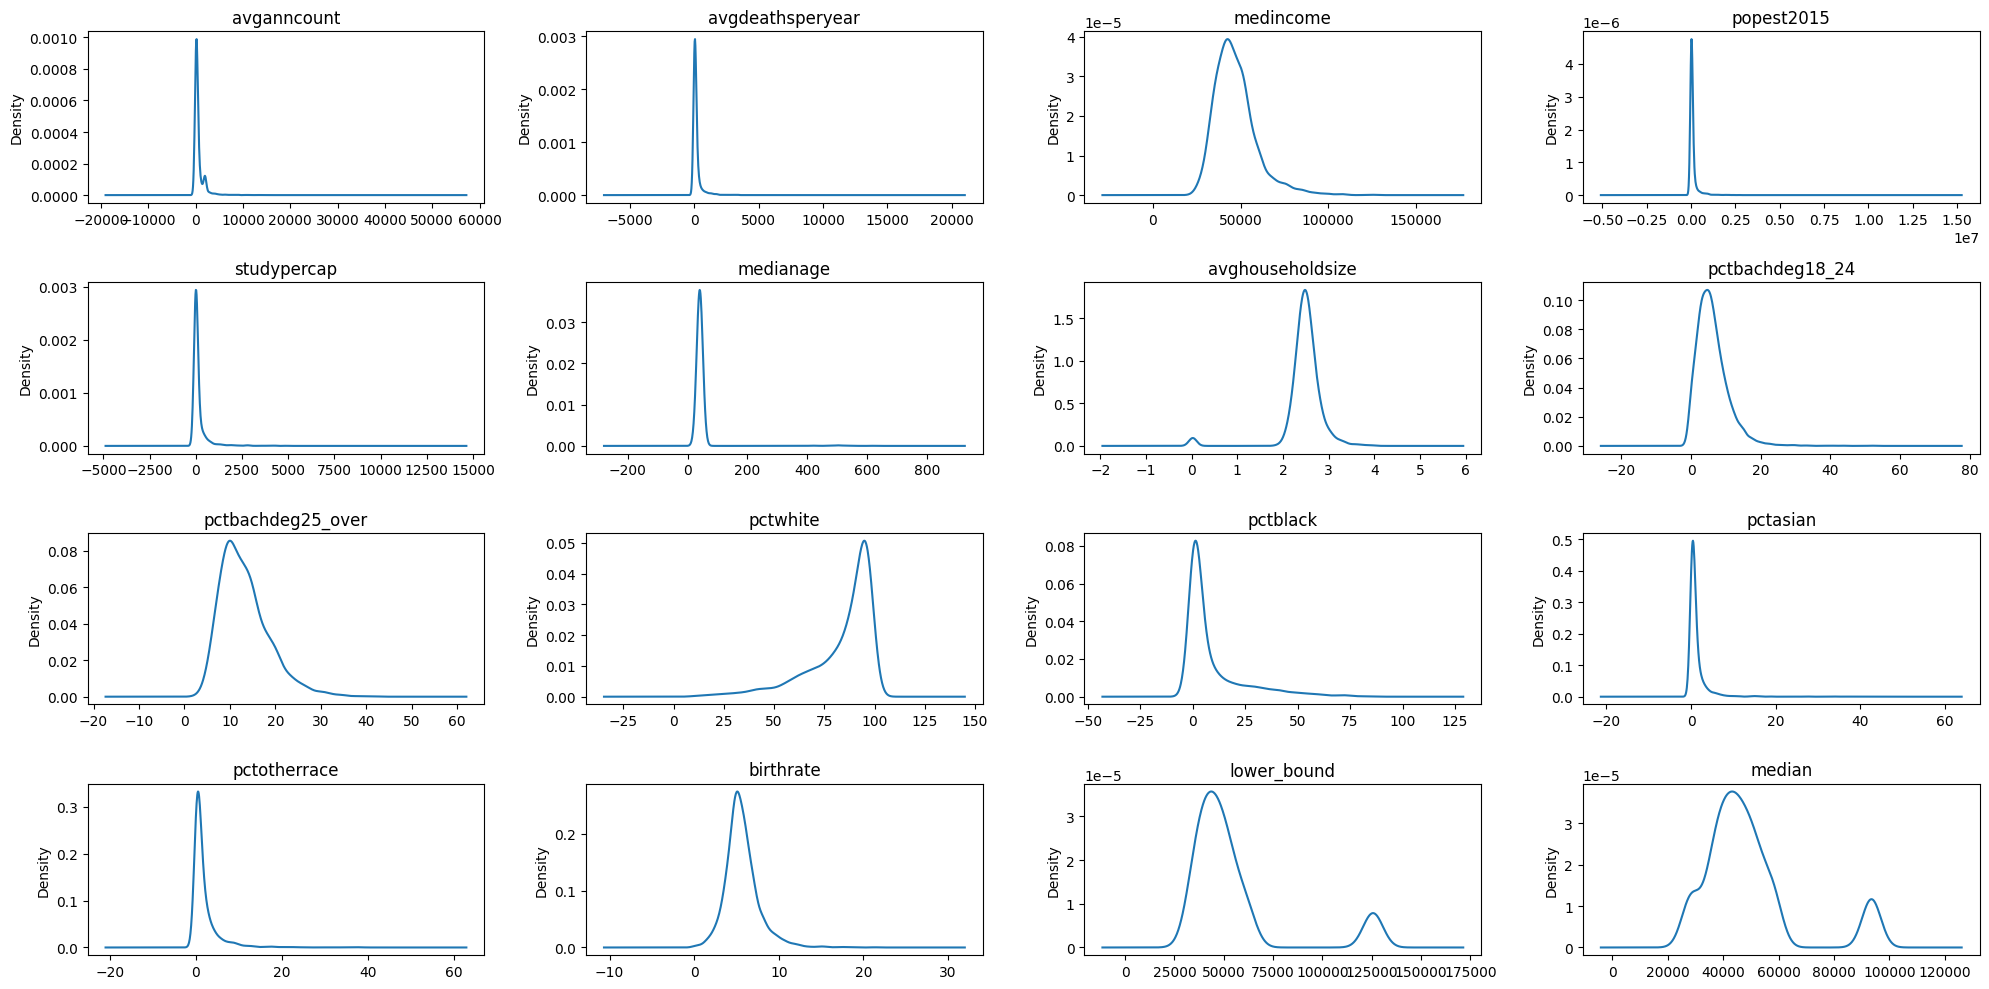

In [61]:
# plot the distribution of the skewed columns which is around 8 columns 


fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
for i , col in enumerate(skewed_col):

    axes[i//4 ,i%4].set_title(col)
    skewed_data[col].plot(kind="density",ax=axes[i//4,i%4],subplots=True,sharex=False)
plt.tight_layout()
plt.show()

In [62]:
def box_plot(data,col):
    fig = go.Figure(data=[go.Box(y=data[col],boxpoints="outliers",jitter=0.3,pointpos=-1.8)])
    fig.update_layout(
        title = "Boxplot of " + col,
        yaxis_title = col,
        width = 500,
        height = 500)
    fig.show()
for col in skewed_col:
    box_plot(processed_data,col)



In [63]:
#checking outlier values studypercap column
percentile25 = processed_data["studypercap"].quantile(0.25)
percentile75 = processed_data["studypercap"].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

print("upper_limit {}".format(upper_limit))
print("lower_limit {}".format(lower_limit))


upper_limit 209.1269406875
lower_limit -125.4761644125


In [64]:
processed_data[(processed_data["studypercap"] > upper_limit) | (processed_data["studypercap"] < lower_limit)]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,4025.000000,1380,177.8,510.900000,60397,843954,13.1,427.748432,35.8,34.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,740.000000,269,172.7,499.300000,51395,121846,15.7,837.122269,41.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,37.2,35.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,1962.667684,138,153.7,453.549422,49246,118053,19.4,660.720185,28.8,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039,1962.667684,9,208.3,453.549422,49256,2968,10.5,673.854447,45.2,45.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,32.2,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
def deal_with_outlier_with_iqr(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    return outliers
cols_have_outliers_skewed = []
for col in skewed_col:
    outliers = deal_with_outlier_with_iqr(processed_data, col)
    shape = outliers.shape
    if shape[0] > 0:
        cols_have_outliers_skewed.append(col)
print(cols_have_outliers_skewed)  



 

['avganncount', 'avgdeathsperyear', 'medincome', 'popest2015', 'studypercap', 'medianage', 'avghouseholdsize', 'pctbachdeg18_24', 'pctbachdeg25_over', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'birthrate', 'lower_bound', 'median']


Trimming

In [66]:
rows_to_remove = processed_data[(processed_data['studypercap'] > upper_limit) | (processed_data["studypercap"] < lower_limit)]

#trim the data

trimming_data = processed_data[(processed_data['studypercap'] < upper_limit) & (processed_data['studypercap'] > lower_limit)]
trimming_data.shape

(2543, 1904)

Capping

In [67]:
#capping

capped_data = processed_data.copy()

capped_data.loc[capped_data['studypercap'] > upper_limit, 'studypercap'] = upper_limit
capped_data.loc[capped_data['studypercap']<  lower_limit, 'studypercap'] = lower_limit
capped_data.shape


(3047, 1904)

In [68]:
def capping(data,col):
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    data.loc[data[col] > upper_limit , col] = upper_limit
    data.loc[data[col] < lower_limit , col] = lower_limit
    return data

for col in  cols_have_outliers_skewed:
    capped_data = capping(processed_data,col)
capped_data.shape

(3047, 1904)

In [69]:
for col in cols_have_outliers_skewed:
    box_plot(capped_data,col)

In [70]:
capped_data.to_csv(r"C:\Users\SAI DURGA PRASAD\Desktop\ols_project\data\capped_data.csv")

In [72]:
capped_data.shape

(3047, 1904)